In [77]:
#House Value Prediction Using Linear Regression and Random Forest 

#Introduction

'''
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in California. It wishes to use the data to predict the sale prices of the properties based on important factors such as the number of bedrooms, ocean proximity, household income, etc.
Essentially, the company wants to identify the variables affecting house prices, to create a model that quantitatively relates house prices with structural and spatial determinants and engineered features, and to know the accuracy of the model, i.e. how well these variables can predict house prices.

'''


'\nProblem Statement:\n\nConsider a real estate company that has a dataset containing the prices of properties in California. It wishes to use the data to predict the sale prices of the properties based on important factors such as number of bedrooms, ocean proximity, household income, etc.\nEssentially, the company wants to identify the variables affecting house prices, to create a model that quantitatively relates house prices with structural and spatial determinants and engineered features, and to know the accuracy of the model, i.e. how well these variables can predict house prices.\n\n'

In [78]:
#Dataset Overview

'''
The data includes information about houses found in a given California district and some summary statistics about them based on the 1990 census data.It is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'.
The columns are as follows:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: number of people residing within a block
7. households: number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea


Below is a PowerBI report of the data for initial data inspection. It shows how the target variable, "Median House Value" is affected by variables such as Latitude, longitude, Median Income, and Sum of rooms.
'''

'\nThe data includes information about houses found in a given California district and some summary statistics about them based on the 1990 census data.It is the dataset used in the second chapter of Aurélien Géron\'s recent book \'Hands-On Machine learning with Scikit-Learn and TensorFlow\'.\nThe columns are as follows:\n1. longitude: A measure of how far west a house is; a higher value is farther west\n2. latitude: A measure of how far north a house is; a higher value is farther north\n3. housingMedianAge: Median age of a house within a block; a lower number is a newer building\n4. totalRooms: Total number of rooms within a block\n5. totalBedrooms: Total number of bedrooms within a block\n6. population: number of people residing within a block\n7. households: number of households, a group of people residing within a home unit, for a block\n8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)\n9. medianHouseValue: Median 

In [79]:
from IPython.display import IFrame
IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiMGIzOGY2MjQtMGVlMC00MmU1LWEzNDQtOTBkOTMxOTNlNDNlIiwidCI6ImFjODRlNDgwLWM5YzAtNDNjMC05MTc0LWVkZWY3ZjY0M2I2ZCJ9",height=600,width=1050)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("C:/Users/Iqra Javaid/OneDrive/Desktop/Spring Term/AI and Machine Learning/archive/housing.csv")

In [84]:
#Preliminary Analysis
#Data cleansing and Exploratory Analysis 

'''
First the data is checked for any null values. 207 null values were found in the column total_bedrooms and were removed consequently.
After that, a linear regression model is built. The data is then prepared to define the predictor and response variables. The target variable is "median_house_value".

A heatmap of the correlation matrix between the different variables in the training data is produced. There is a high positive correlation between households and median income with the target variable median_house_value.
There is a high negative correlation between longitude and median_house_value. A high negative correlation between house value and longitude means that as the longitude values increase (moving to the west), the house values decrease. This indicates that houses located in the western part of the area tend to have lower values than those located in the eastern part. This relationship could be due to a number of factors such as location, neighborhood, amenities, or accessibility.
To investigate this relationship further, a scatter plot of the longitude values against the house values is created;  a regression line to visualize the trend is included. 

The categorical values in the column ocean_proximity are separated into columns to understand the relationship between them and the target variable, as part of data pre-processing.
From the heatmap of the correlation matrix, it can be observed that houses located closer to the ocean tend to have a higher value due to their proximity to the water and the views they offer. The high positive correlation between the variable <1H OCEAN and median_house_value confirms this. Similarly, houses located inland tend to have a lower value compared to houses located closer to the ocean. This is because proximity to the ocean is often considered a desirable feature in real estate, and houses located closer to the water typically command a higher price. The negative correlation between median_house_value and feature engineered column INLAND confirms this.
A scatter plot of house value by location is created which shows how the value of houses is distributed across different geographical locations within the region. It can be used to spot clusters of high and low value neighbourhoods and help gain insights into the local housing market. To further improve the analysis, geographical features such as local amenities, landmarks, etc can be added to the dataset to study their effect on the house value. 

Two features namely bedroom_ratio and household_rooms are engineered to improve the performance of the models. The bedroom ratio can be a strong predictor of the value of a property. Properties with a higher bedroom ratio may command a higher price, as they are often considered more functional and desirable.
The bedroom ratio can also provide insights into the current market demand for certain types of properties. For example, if there is a high demand for family homes with multiple bedrooms, properties with a high bedroom ratio may be more attractive to buyers and renters. Similarly, household rooms can provide insight into the room functionality of a property and is used to improve the accuracy of the model. ''' 

'\nFirst the data is checked for any null values. 207 null values were found in the column total_bedrooms and were removed consequently.\nAfter that, a linear regression model is built. The data is then prepared to define the predictor and response variables. The target variable is "median_house_value".\n\nA heatmap of the correlation matrix between the different variables in the training data is produced. There is a high positive correlation between households and median income with the target variable median_house_value.\nThere is a high negative correlation between longitude and median_house_value. A high negative correlation between house value and longitude means that as the longitude values increase (moving to the west), the house values decrease. This indicates that houses located in the western part of the area tend to have lower values than those located in the eastern part. This relationship could be due to a number of factors such as location, neighborhood, amenities, or acc

In [85]:
df.describe() #summary statistics 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [86]:
df.isnull().sum() #check for nulls in the data

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [87]:
df.dropna(inplace=True) #pre-processing to remove null values

In [88]:
from sklearn.model_selection import train_test_split #import train test split from sklearn

In [89]:
X=df.drop(['median_house_value'], axis=1) #x is the dataframe without the target variable
#median house value is our target variable, it is what we'll be predicting
Y=df['median_house_value'] 

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2) #20 percent of the data reserved for evaluating (test data)


In [91]:
train_data= X_train.join(Y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

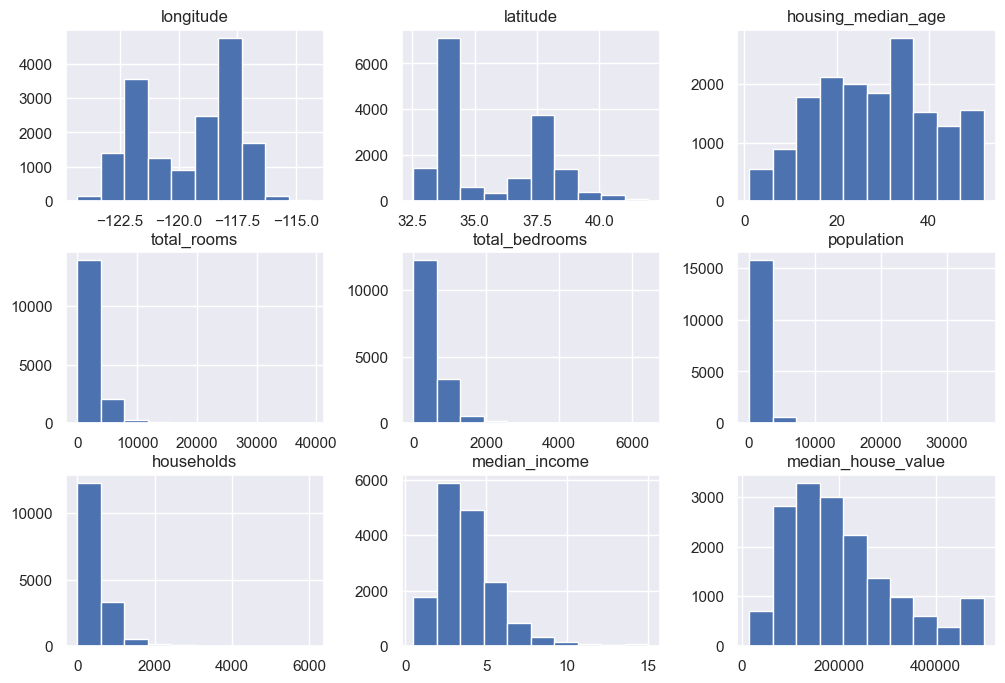

In [92]:
train_data.hist(figsize=(12,8))  #variation in the different features and their correlation with the target variable

<AxesSubplot:>

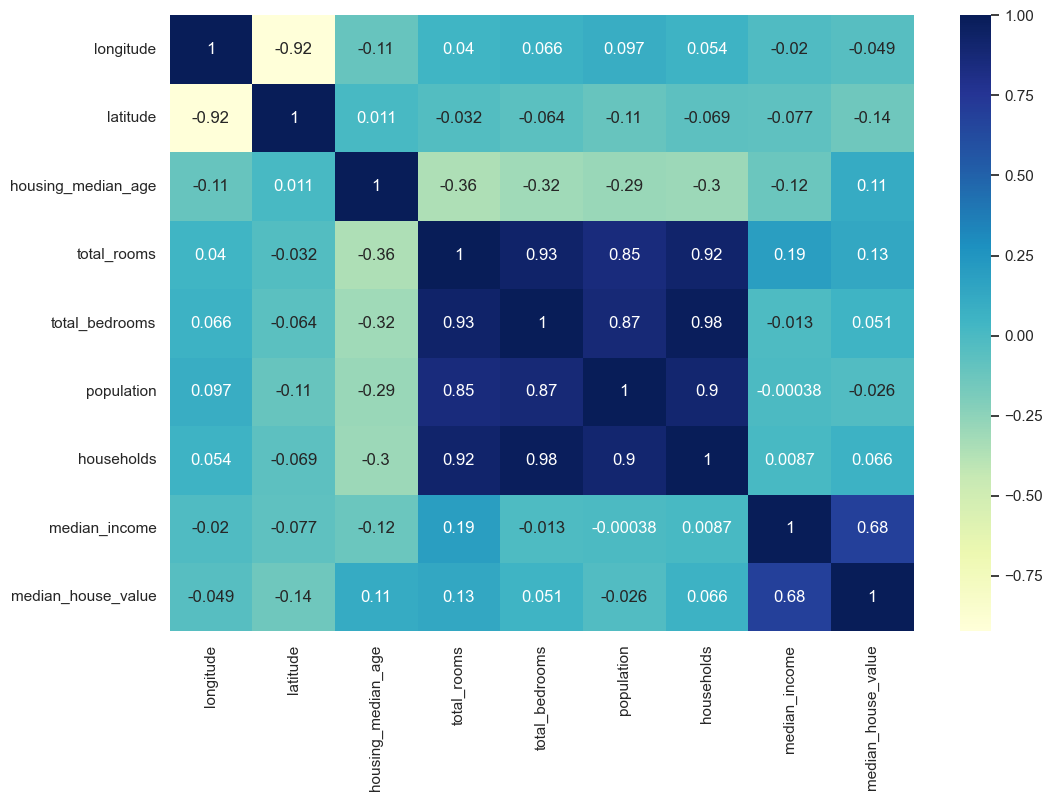

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") 
#the heatmap of correlation below is a visual representation of the correlation matrix between the different features in the dataset.
 

In [94]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10041,-121.06,39.21,52.0,1452.0,309.0,637.0,299.0,2.2083,INLAND,103900.0
6651,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN,500001.0
5126,-118.28,33.99,38.0,1454.0,323.0,1098.0,297.0,1.5109,<1H OCEAN,104000.0
16320,-121.34,37.99,11.0,4487.0,868.0,2195.0,780.0,3.9615,INLAND,194600.0
7363,-118.20,33.97,28.0,2474.0,702.0,2830.0,694.0,2.7540,<1H OCEAN,166200.0
...,...,...,...,...,...,...,...,...,...,...
11108,-117.89,33.85,18.0,2036.0,414.0,1292.0,380.0,3.8750,<1H OCEAN,273000.0
8479,-118.32,33.93,34.0,1536.0,273.0,804.0,287.0,4.9615,<1H OCEAN,157800.0
18368,-121.98,37.16,42.0,2533.0,433.0,957.0,398.0,5.3468,<1H OCEAN,279900.0
604,-122.08,37.69,36.0,2350.0,499.0,1105.0,467.0,3.3021,NEAR BAY,195700.0


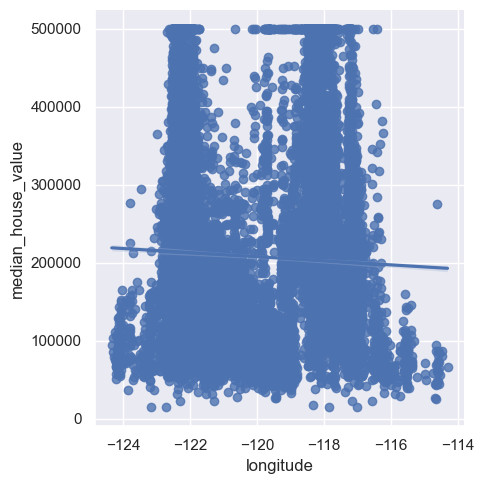

In [95]:
# scatter plot with regression line to study negative correlation of longitude with target variable
sns.lmplot(x='longitude', y='median_house_value', data=df)

# display the plot
plt.show()

#the negative slope of the regression line confirms the negative correlation between longitude and median_house_value

In [96]:
train_data["total_rooms"] = np.log(train_data['total_rooms']+1)
train_data["total_bedrooms"] = np.log(train_data['total_bedrooms']+1)
train_data["population"] = np.log(train_data['population']+1)
train_data["households"] = np.log(train_data['households']+1)
#from the histogram, we can tell that most of the data is skewed (right skewed for example, households, median income, etc) so we take their log

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

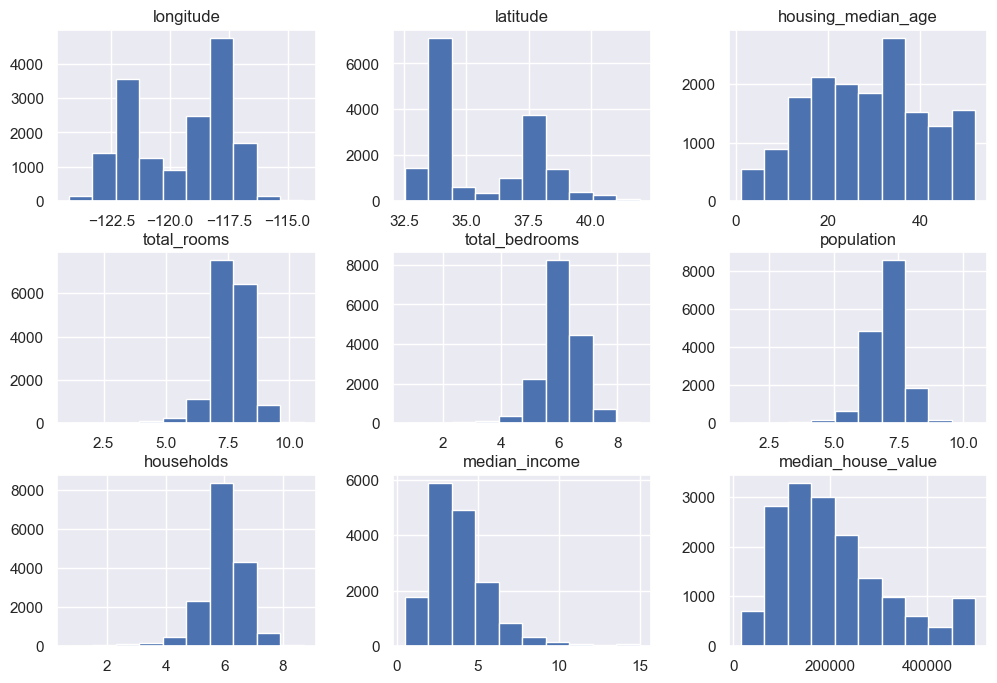

In [97]:
train_data.hist(figsize=(12,8)) #now looks more like gaussian normal distribution

In [98]:
df.dropna(inplace=True)

In [99]:
train_data.ocean_proximity.value_counts() #we want to make separate columns for the different categorical values of the column ocean proximity

<1H OCEAN     7182
INLAND        5212
NEAR OCEAN    2130
NEAR BAY      1818
ISLAND           4
Name: ocean_proximity, dtype: int64

In [100]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1) #join these new columns with the training data

<AxesSubplot:>

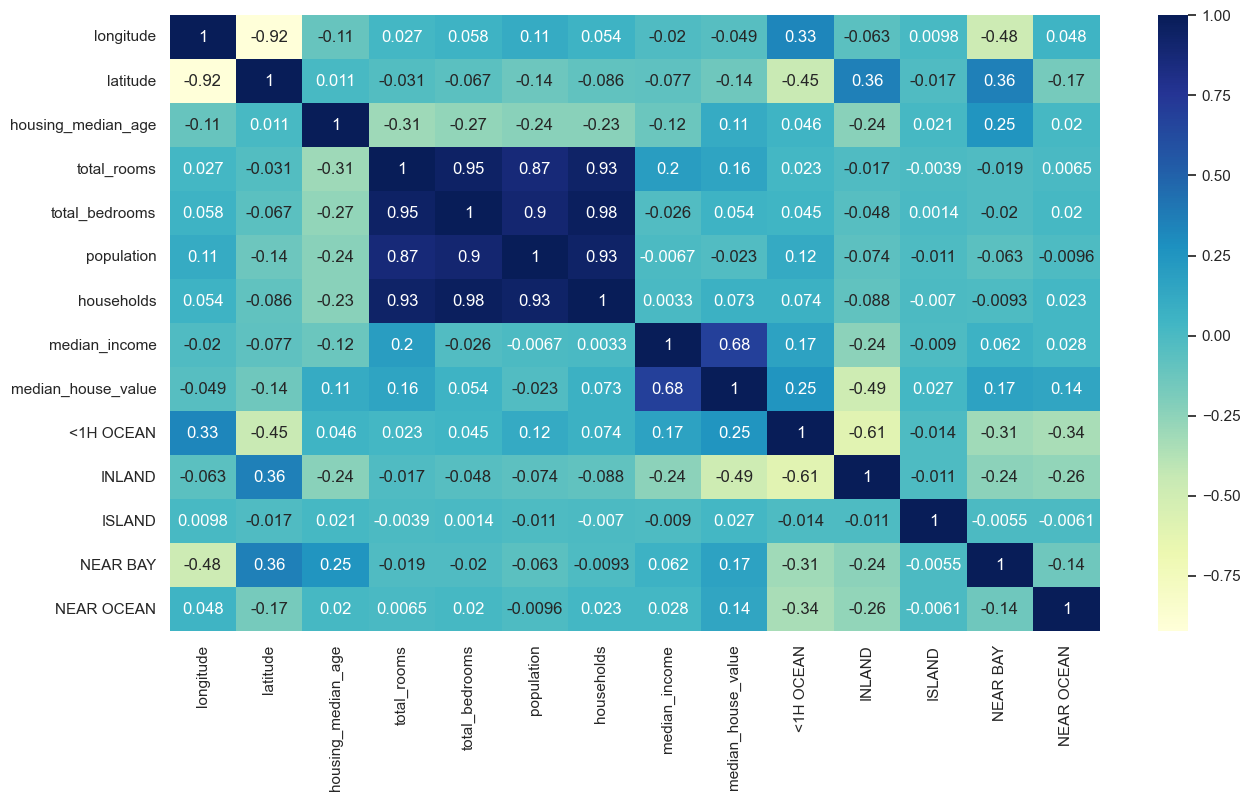

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu') # high positive correlation of median house value with houses <1H from the ocean  
#negative correlation of median_house_value with INLAND

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

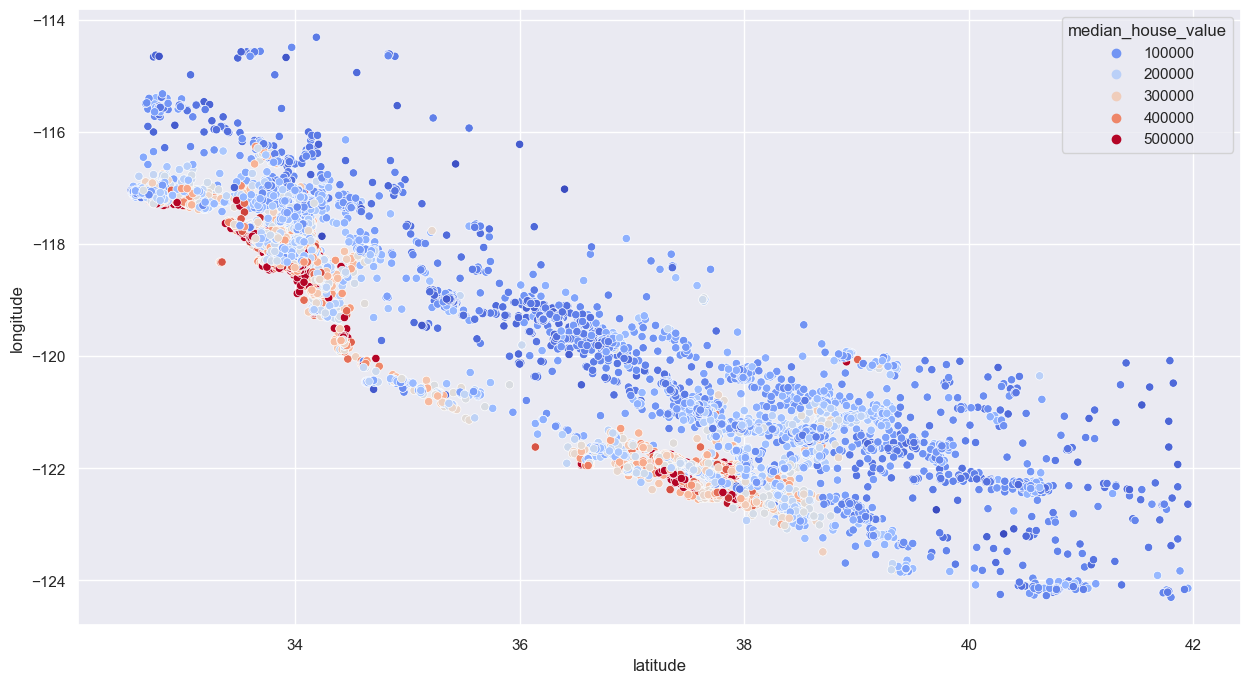

In [102]:
#House value by location
sns.set() #to use default seaborn parameters 
sns.set_style('darkgrid') 
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value",palette="coolwarm") #to check how proximity affects prices and identify patterns in house value across different neighbourhoods and regions

In [103]:
#Feature engineering
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms'] #gives ratio of how many bedrooms in a house
train_data['household_rooms']= train_data['total_rooms']/train_data['households'] #avg of rooms in a household
#here we engineered two feature that are important in terms of correlation to our target variable

<AxesSubplot:>

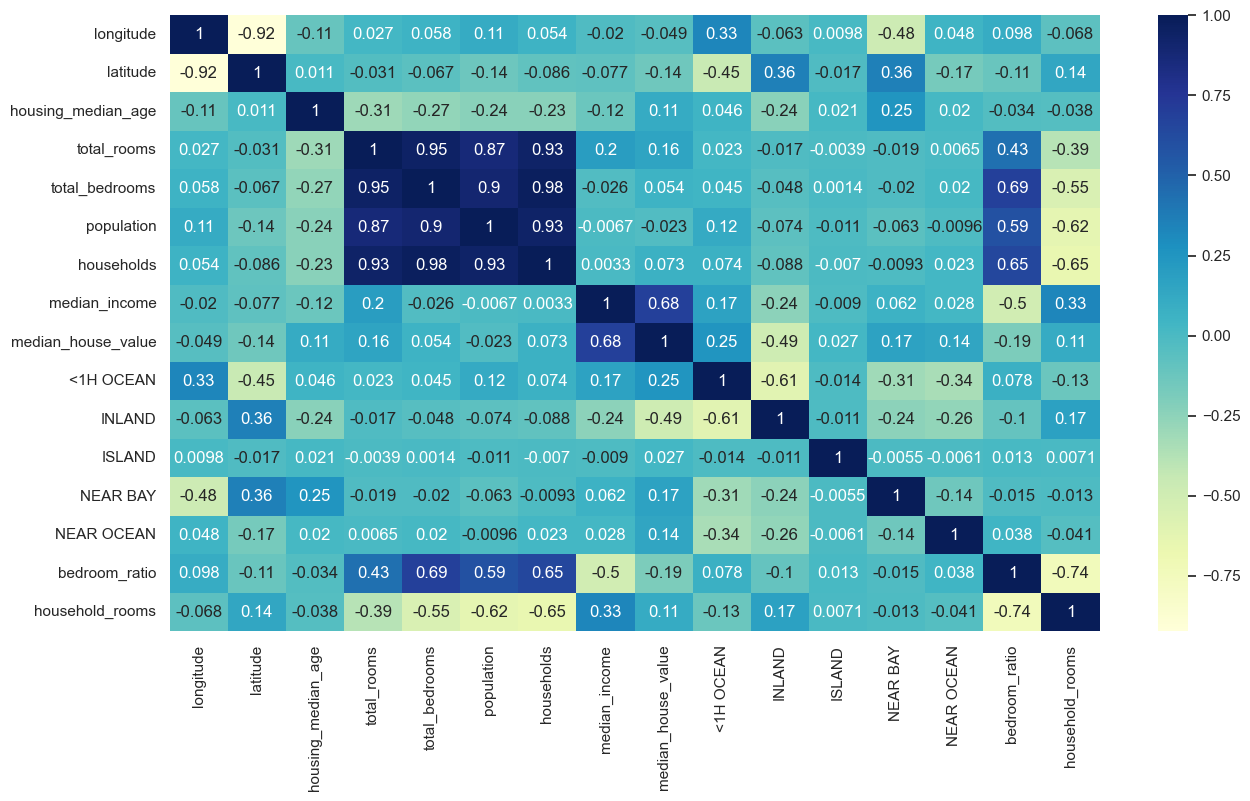

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

In [104]:
#Methods
#1. Linear Regression
'''

The first Machine Learning algorithm used for predicting the value of a residential property in California Region is Linear Regression because of its linearity and interpretability. Moreover, because the dataset in use has a moderate number of features and a small number of observations, Linear Regression performs well. It is also relatively computationally efficient. However, the performance of the Linear Regression model may be limited in this case by the quality and quantity of the data as it sits at a size between being too toyish and too cumbersome.
To evaluate the performance of the model, first the data is split into training and test sets. X_train includes all variables except the target variable, whereas, Y_train contains only the target variable. The method reg.fit is used to train the regression model on the dataset. 
Test data is pre-processed in the same way as the training data. Feature engineering is performed and log is taken for achieving normal distribution for all variables. 
Finally, the test data is used to evaluate the performance of the trained model. Predict method returns the predicted output based on the model's learned parameters. 
The model is then evaluated using mean_squared_error, mean_absolute_error, and r2_score which are the three common evaluation metrics used to assess the performance of regression models. The score method is used which returns a scalar value that represents the goodness of fit of the linear regression model for house value prediction.
'''

'\nThe first Machine Learning algorithm used for predicting the value of a residential property in California Region is Linear Regression because of its linearity and interpretability. Moreover, because the dataset in use has a moderate number of features and a small number of observations, Linear Regression performs well. It is also relatively computationally efficient. However, the performance of the Linear Regression model may be limited in this case by the quality and quantity of the data as it sits at a size between being too toyish and too cumbersome.\nTo evaluate the performance of the model, first the data is split into training and test sets. X_train includes all variables except the target variable, wehereas, Y_train contains only the target variable. The method reg.fit is used to train the regression model on the dataset. \n\n'

In [105]:
#Linear Regression
from sklearn.linear_model import LinearRegression
X_train, Y_train= train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train, Y_train)


LinearRegression()

In [106]:
test_data=X_test.join(Y_test)

test_data["total_rooms"] = np.log(test_data['total_rooms']+1)
test_data["total_bedrooms"] = np.log(test_data['total_bedrooms']+1)
test_data["population"] = np.log(test_data['population']+1)
test_data["households"] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms'] 
test_data['household_rooms']= test_data['total_rooms']/test_data['households']

X_test, Y_test= test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
y_pred=reg.predict(X_test)


In [107]:
y_pred

array([167364.29034146, 351818.6695751 , 151460.11540519, ...,
       422024.62123489, 307825.70371903, 168783.69772651])

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  4349730954.61099
Root Mean Squared Error:  65952.4901319957
Mean Absolute Error:  47650.14642921123
R-squared:  0.681082570469806


In [21]:
test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17456,-120.43,34.69,33.0,7.628031,5.924256,6.973543,5.883322,3.6023,128300.0,0,0,0,0,1,0.776643,1.296552
11910,-117.41,33.96,24.0,8.407825,6.804615,7.782807,6.714171,3.8640,123400.0,0,1,0,0,0,0.809319,1.252251
17609,-121.92,37.29,34.0,6.850126,4.912655,5.937536,4.941642,5.1765,344600.0,1,0,0,0,0,0.717163,1.386204
18097,-122.05,37.33,17.0,8.209308,6.715383,7.218910,6.543912,6.3131,436400.0,1,0,0,0,0,0.818021,1.254496
18880,-122.26,38.10,30.0,8.107117,6.965080,7.492760,6.898715,1.1835,133300.0,0,0,0,1,0,0.859132,1.175163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,-118.41,33.92,32.0,7.859799,6.410175,7.032624,6.320768,4.2333,358000.0,1,0,0,0,0,0.815565,1.243488
7271,-118.23,33.99,5.0,6.561031,5.318120,6.733402,5.298317,4.5208,165000.0,1,0,0,0,0,0.810562,1.238323
18217,-122.08,37.40,23.0,6.693324,5.068904,5.924256,5.056246,5.9291,284600.0,0,0,0,1,0,0.757307,1.323773
6604,-118.17,34.18,38.0,7.155396,5.446737,6.720220,5.472271,4.3750,166700.0,1,0,0,0,0,0.761207,1.307574


In [109]:
reg.score(X_test,Y_test)

0.681082570469806

In [ ]:
#Methods
#2. Random Forest Regressor
'''
The second algorithm used for house value prediction is Random Forest Regressor. It is a powerful machine learning algorithm for predicting house values due to its ability to handle complex relationships, robustness to noise and outliers, ability to reduce overfitting, and interpretability. 
An instance of the RandomForestRegressor class is created with n_estimators=[3,10,30] and max_features=[2,4,6,8]. The training data is fitted to the model using the fit() method and then the model is evaluated on the test data using the mean squared error, mean absolute error, and R2 score.
Random Forest is particularly suitable for this type of prediction as it reeduces overfitting. It uses multiple decision trees, and by combining the results of these trees, it can reduce the risk of overfitting. 
The trees are trained on different subsets of the data and different subsets of features, which increases the diversity of the ensemble and improves the model's generalization performance.

Forest.score() method is used to evaluate the performance of the trained model on the test dataset X_test.forest.score(X_test, Y_test) returns the coefficient of determination R^2 of the prediction.

A param_grid that specifies the values to try for each hyperparameter is defined. An instance of the RandomForestRegressor class with default hyperparameters is created and then an instance of the GridSearchCV class is created, specifying the hyperparameter grid to search and the number of cross-validation folds to use.
Then the training data is fitted to the model using grid_search.fit(X_train, Y_train). After grid search is complete, the best hyperparameters and the best estimator are calculated using grid_search.best_params_ and grid_search.best_estimator_.
The grid_search.best_estimator_ gives the best set of hyperparameters found during grid search. 

'''

In [110]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
y_pred_RFR=forest.predict(X_test) #predict values using trained model


In [111]:
# y_pred_RFR=forest.predict([256265.24,2313])
print(X_test)
print(y_pred_RFR)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9737     -121.76     36.77                27.0     7.383368        6.222576   
17481    -119.81     34.45                24.0     8.210396        6.342121   
12373    -116.45     33.80                 9.0     8.618847        7.095893   
3664     -118.37     34.23                32.0     7.275865        5.762051   
7106     -118.01     33.90                26.0     7.995980        6.514713   
...          ...       ...                 ...          ...             ...   
16556    -121.29     37.80                 6.0     4.709530        3.295837   
16683    -120.57     35.11                18.0     7.979681        6.322565   
17854    -121.89     37.46                 5.0     7.326466        5.231109   
18147    -122.04     37.35                28.0     7.367077        5.579730   
13182    -117.71     33.97                10.0     9.292565        7.731492   

       population  households  median_income  <1H O

In [112]:
mse = mean_squared_error(Y_test, y_pred_RFR)
rmse = mean_squared_error(Y_test, y_pred_RFR, squared=False)
mae = mean_absolute_error(Y_test, y_pred_RFR)
r2 = r2_score(Y_test, y_pred_RFR)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  2427854962.642315
Root Mean Squared Error:  49273.26823585295
Mean Absolute Error:  32224.916405676533
R-squared:  0.8219923779108175


In [113]:
forest.score(X_test,Y_test) #method used to evaluate the performance of the trained model

0.8219923779108175

In [30]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()

param_grid={
    
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
    
} #provide parameter grid for grid search, specify the different hyperparameters that need to be tried

grid_search= GridSearchCV( forest,param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train,Y_train) #fit this grid search onto X_train

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
best_forest= grid_search.best_estimator_ #gives the best set of hyperparameters found during grid search

In [33]:
best_forest.score(X_test,Y_test) #evaluate the model using evaluation metric

0.8223371804634941

In [ ]:
#Results
'''
As per the evaluation of both models used, Random Forest has a higher accuracy of predicting house value. This is because there is a non-linear relationship between the target variable and input features. 

The regression score of 0.68 suggests that the model explains 68% of the variance in the target variable using the available features. 
There is likely still room for improvement. It is noteworthy to mention that the performance of a house value prediction model can depend on many factors, including the quality and size of the dataset, the specific features used, and the complexity of the model, among others. The MSE suggests that the model's predictions are, on average, about $4.3 million off from the true house values.
Lower MSE and RMSE indicate better performance. 

The best_forest.score of 0.8223 suggests that the model is able to explain a significant proportion of the variation in the house values based on the available features. 
A higher score indicates better performance, so a score of 0.8223 suggests that the model is performing well. 
It's also possible that different evaluation metrics could provide different perspectives on the model's performance. Nonetheless, a best forest score of 0.8223 is a promising result for a model for house value prediction.
Therefore, the Random Forest Regressor is a more powerful algorithm for predicting house values as it also involves hyperparameter tuning. It is a more optimal model than Linear Regression.
The data was scaled but as it did not significantly improve the accuracy, it isn't included in the final code. The accuracy of the model can be further improved by improving the quality and size of the dataset, feature optimization, and increasing the complexity of the model.



'''